Aluno: Jean Antonio Ribeiro<br>
RA: 265739



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_heart = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/raw/heart.csv")
df_age   = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-age.csv")
df_chol  = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-chol.csv")
df_sex   = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-sex.csv")

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# age

Classificação: MNAR, pois os dados faltantes podem ter sidos não informados ou importados de forma errada para a tabela, ocazionando falta de dados na tabela, por exemplo.

Descrição da solução proposta para reposição dos dados faltantes: pode-se aplicar a normalização dos dados e, em seguida, utilizar a média entre dois ou mais pontos.

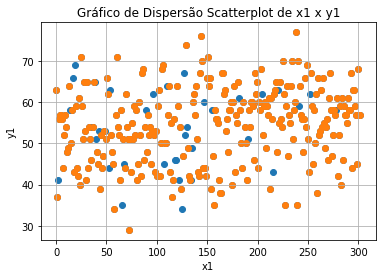

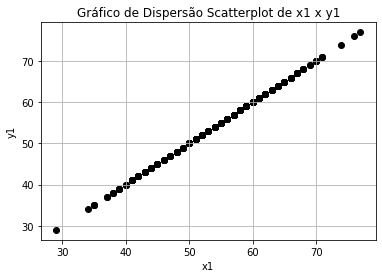

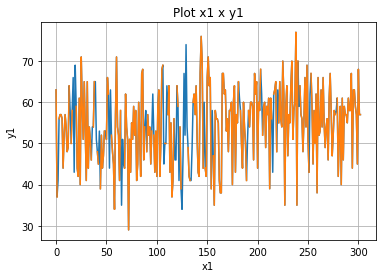

In [ ]:
plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['age'])),df_heart['age'])
plt.scatter(range(0,len(df_age['age'])),df_age['age'])
plt.grid()
plt.show()

plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(df_heart['age'], df_age['age'], c='k')
plt.grid()
plt.show()

plt.figure()
plt.title('Plot x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.plot(df_heart['age'], label='heart')
plt.plot(df_age['age'], label='age')
plt.grid()
plt.show()

In [ ]:
df_age['age'].head(20)

0     63.0
1     37.0
2      NaN
3     56.0
4     57.0
5     57.0
6     56.0
7     44.0
8     52.0
9     57.0
10    54.0
11    48.0
12    49.0
13    64.0
14     NaN
15    50.0
16    58.0
17     NaN
18    43.0
19     NaN
Name: age, dtype: float64

# chol

Classificação: MNAR, pois os dados faltantes podem ter ocorridos por causa do aparelho que mede o colesterol ter falhado, por exemplo.

Descrição da solução proposta para reposição dos dados faltantes: pode-se utilizar a média entre dois ou mais pontos.

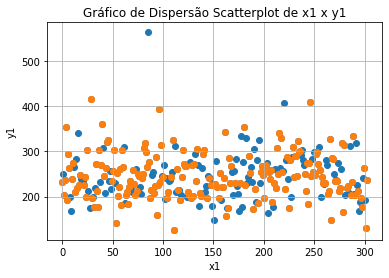

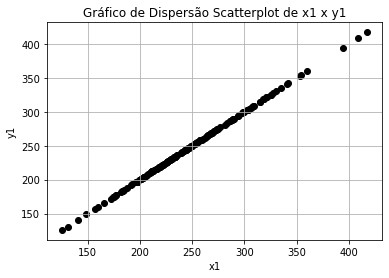

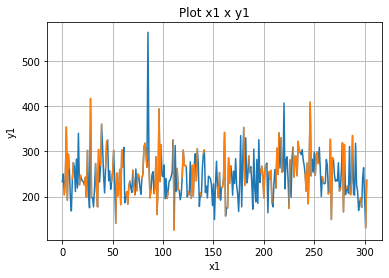

In [ ]:
plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['chol'])),df_heart['chol'])
plt.scatter(range(0,len(df_chol['chol'])),df_chol['chol'])
plt.grid()
plt.show()

plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(df_heart['chol'], df_chol['chol'], c='k')
plt.grid()
plt.show()

plt.figure()
plt.title('Plot x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
#plt.scatter(range(0,len(df_heart['chol'])),df_chol['chol'])
plt.plot(df_heart['chol'], label='heart')
plt.plot(df_chol['chol'], label='chol')
plt.grid()
plt.show()

In [ ]:
df_chol['chol'].head(20)

0     233.0
1       NaN
2     204.0
3     236.0
4     354.0
5     192.0
6     294.0
7     263.0
8       NaN
9       NaN
10    239.0
11    275.0
12      NaN
13    211.0
14      NaN
15    219.0
16      NaN
17    226.0
18    247.0
19      NaN
Name: chol, dtype: float64

# sex

Classificação: MAR, pois os dados faltantes podem ter sido não informados porque as pessoas não queriam ser identificados no requisito sexo, por exemplo.

Descrição da solução proposta para reposição dos dados faltantes: pode-se utilizar a distância entre dois pontos.

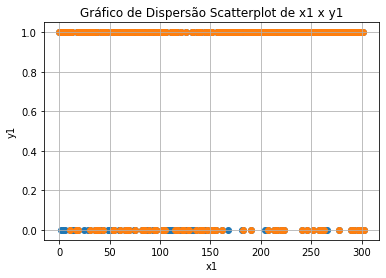

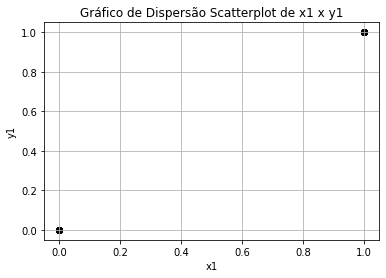

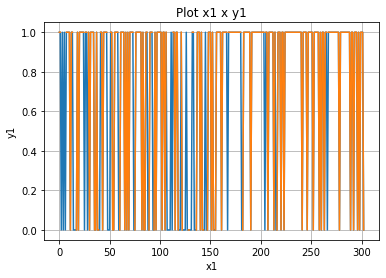

In [ ]:
plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['sex'])),df_heart['sex'])
plt.scatter(range(0,len(df_sex['sex'])),df_sex['sex'])
plt.grid()
plt.show()

plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(df_heart['sex'], df_sex['sex'], c='k')
plt.grid()
plt.show()

plt.figure()
plt.title('Plot x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.plot(df_heart['sex'], label='heart')
plt.plot(df_sex['sex'], label='sex')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.grid()
plt.show()

In [ ]:
df_sex['sex'].head(20)

0     1.0
1     1.0
2     NaN
3     1.0
4     NaN
5     1.0
6     NaN
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    1.0
13    1.0
14    NaN
15    NaN
16    NaN
17    0.0
18    1.0
19    0.0
Name: sex, dtype: float64